<a href="https://colab.research.google.com/github/CainanJose/Projeto-AC2-Classifica-o-Certo/blob/main/Projeto_AC2_Classifica%C3%A7%C3%A3o_Certo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1️⃣ Introdução



"""
O objetivo deste projeto é desenvolver um modelo de **Classificação** capaz de prever
a presença de **distúrbios do sono** com base em fatores de saúde e estilo de vida.

O conjunto de dados escolhido — **Sleep Health and Lifestyle Dataset** — contém
informações sobre idade, duração do sono, nível de estresse, frequência cardíaca,
atividade física, entre outros fatores, com o rótulo alvo (`Sleep Disorder`).

Essa tarefa se enquadra no **aprendizado supervisionado de classificação**,
pois o objetivo é prever uma **classe discreta** (por exemplo: “None”, “Insomnia” ou “Sleep Apnea”)
a partir de atributos numéricos e categóricos.
"""

## 2️⃣ Análise Exploratória dos Dados (EDA)


### 2.1 Carregamento e visão geral

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense



# Leitura do dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

df_teste = df.copy()



In [2]:

display(df_teste.head())

df_teste.info()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [3]:
print("\nQtd de linhas e colunas:", df_teste.shape)


Qtd de linhas e colunas: (374, 13)



O conjunto de dados contém informações sobre hábitos de vida e características fisiológicas
de diferentes indivíduos, incluindo fatores como idade, duração e qualidade do sono, nível
de estresse, atividade física, entre outros. A variável-alvo é **Sleep Disorder**,
que indica se a pessoa apresenta algum tipo de distúrbio do sono (ex.: 'None', 'Insomnia', 'Sleep Apnea').

Cada linha representa uma pessoa distinta (identificada por 'Person ID'),
e as colunas trazem diferentes aspectos de saúde e comportamento.


### 2.2 Estatísticas descritivas

In [4]:
df_teste.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000



As estatísticas descritivas permitem observar a variação e distribuição das variáveis numéricas,
como 'Age', 'Sleep Duration' e 'Heart Rate'. Esses valores ajudam a identificar possíveis
faixas anormais e orientar futuras etapas de normalização ou remoção de outliers.


### 2.3 Análise de valores ausentes

In [5]:
print("Valores ausentes por coluna:")
print(df_teste.isnull().sum())
# Percentual de valores nulos (%)
(df_teste.isnull().sum() / df_teste.shape[0] * 100).round(2)

Valores ausentes por coluna:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


,0
Person ID,0.00
Gender,0.00
Age,0.00
Occupation,0.00
Sleep Duration,0.00
Quality of Sleep,0.00
Physical Activity Level,0.00
Stress Level,0.00
BMI Category,0.00
Blood Pressure,0.00


Nesta etapa foi realizada a análise de valores ausentes em todas as colunas do conjunto de dados.  
Os resultados mostraram que a maior parte das variáveis não apresenta dados faltantes, com exceção da coluna **Sleep Disorder**, que possui uma parcela significativa de valores nulos (cerca de 58% dos registros).  

Essa verificação é importante para identificar possíveis problemas de qualidade dos dados e orientar as decisões de pré-processamento nas etapas seguintes, como preenchimento (imputação) ou tratamento específico da variável-alvo.


### 2.4 Distribuição das Variáveis e Identificação de Outliers

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Sales Representative'),
  Text(3, 0, 'Teacher'),
  Text(4, 0, 'Nurse'),
  Text(5, 0, 'Engineer'),
  Text(6, 0, 'Accountant'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Lawyer'),
  Text(9, 0, 'Salesperson'),
  Text(10, 0, 'Manager')])

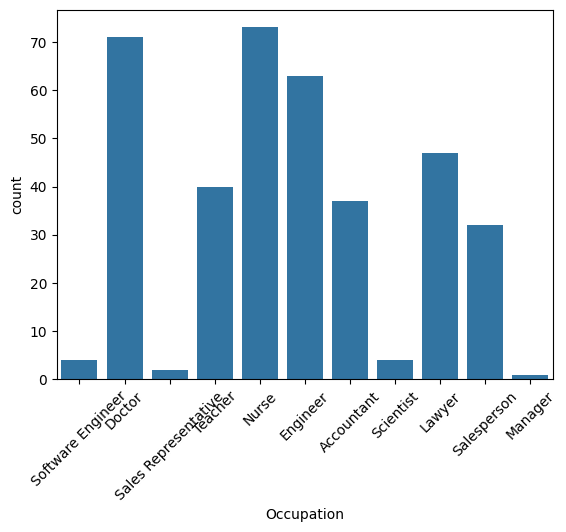

In [6]:
sns.countplot(x='Occupation', data=df_teste)
plt.xticks(rotation=45)


/tmp/ipython-input-920471110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_teste, x='Sleep Disorder', palette='viridis')


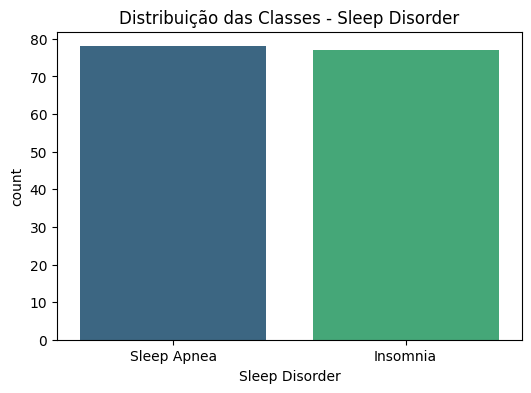

In [7]:
# --- Distribuição das classes ---
plt.figure(figsize=(6,4))
sns.countplot(data=df_teste, x='Sleep Disorder', palette='viridis')
plt.title('Distribuição das Classes - Sleep Disorder')
plt.show()


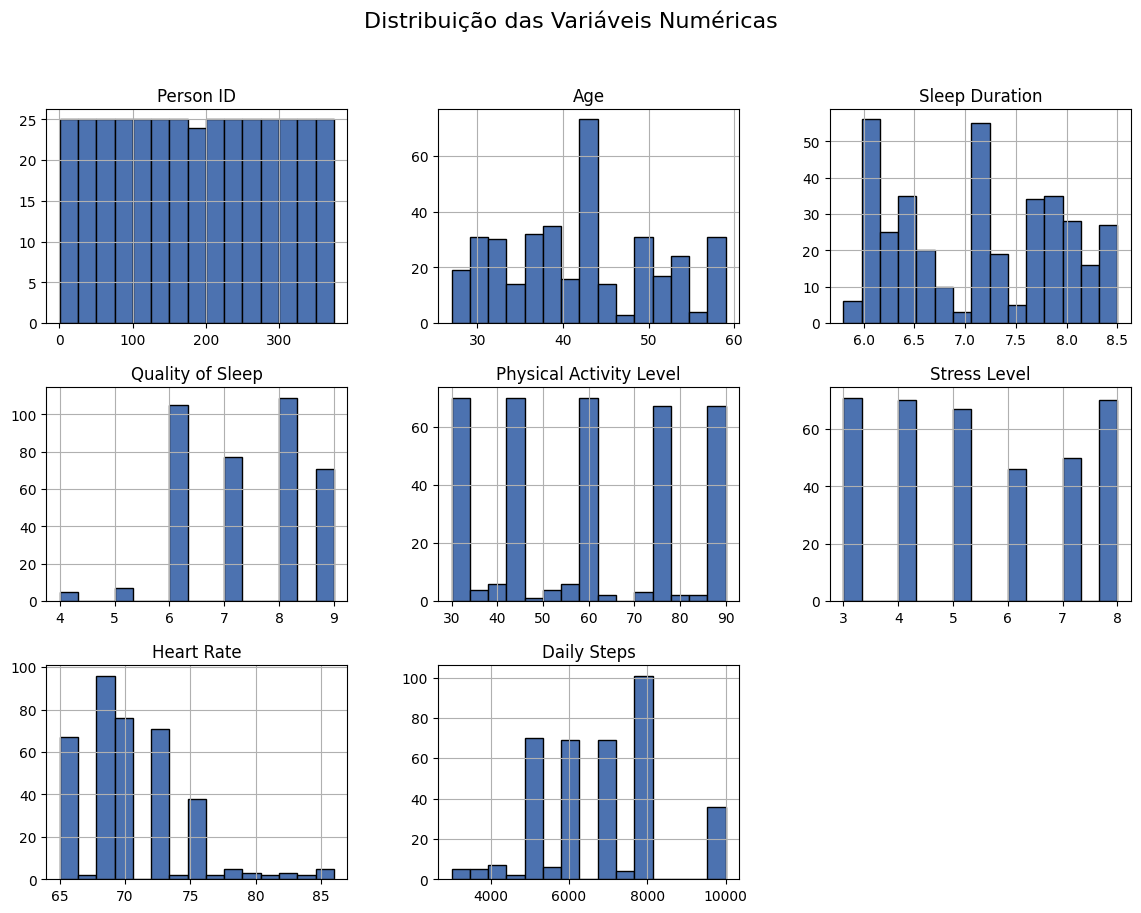

In [8]:
# --- Distribuição numérica geral ---
df_teste.hist(bins=15, figsize=(14,10), color='#4C72B0', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.show()

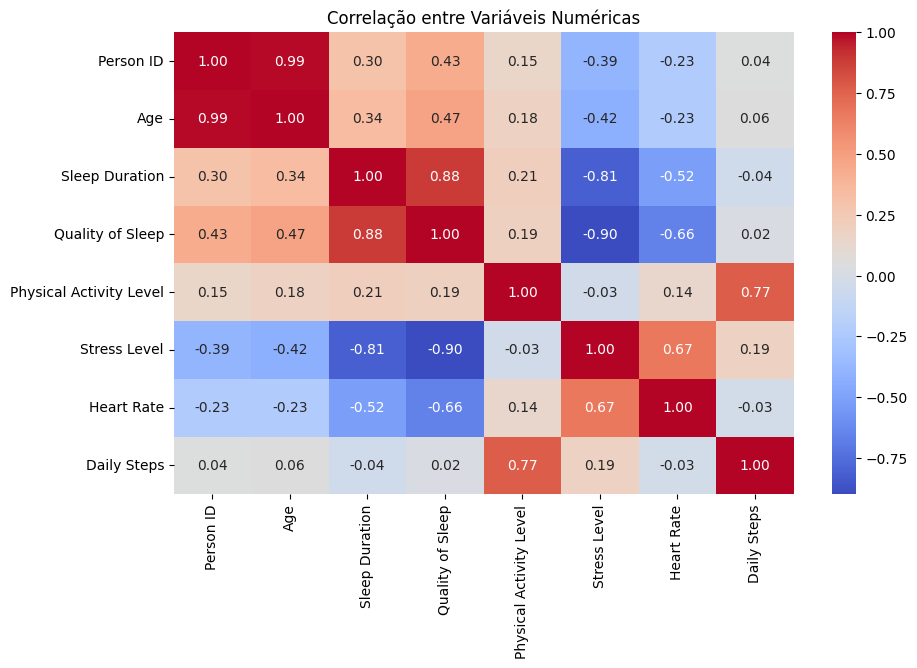

In [9]:
# --- Correlação numérica ---
plt.figure(figsize=(10,6))
sns.heatmap(df_teste.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

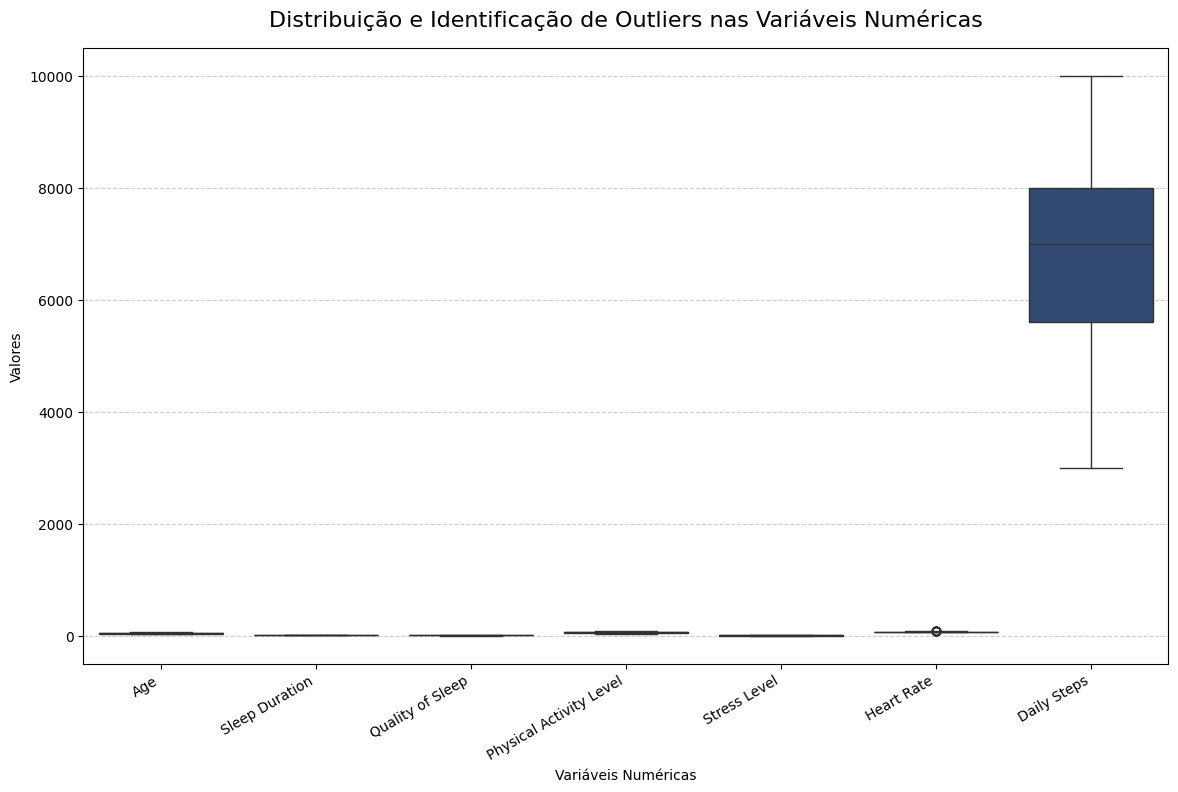

Resumo estatístico das variáveis numéricas:


,count,mean,std,min,25%,50%,75%,max
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0


In [10]:


num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep',
             'Physical Activity Level', 'Stress Level',
             'Heart Rate', 'Daily Steps']

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_teste[num_cols], palette='crest')  # visual mais suave e moderno
plt.title('Distribuição e Identificação de Outliers nas Variáveis Numéricas', fontsize=16, pad=15)
plt.ylabel('Valores')
plt.xlabel('Variáveis Numéricas')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Estatísticas rápidas
print("Resumo estatístico das variáveis numéricas:")
display(df_teste[num_cols].describe().T)


Nesta etapa, foi realizada a análise da **distribuição das variáveis** e a **identificação de possíveis outliers**.  
Os gráficos de contagem permitiram visualizar a distribuição das profissões e dos tipos de distúrbio do sono, evidenciando um leve desequilíbrio entre as classes.  
Já os histogramas e o mapa de calor de correlação mostraram a variabilidade das variáveis numéricas e suas relações, destacando padrões entre idade, frequência cardíaca e duração do sono.  

Por fim, os boxplots revelaram a presença de alguns outliers em variáveis fisiológicas, como **Heart Rate** e **Sleep Duration**, que foram posteriormente tratados no pré-processamento.


### 2.5 Tratamento Inicial e Balanceamento das Classes

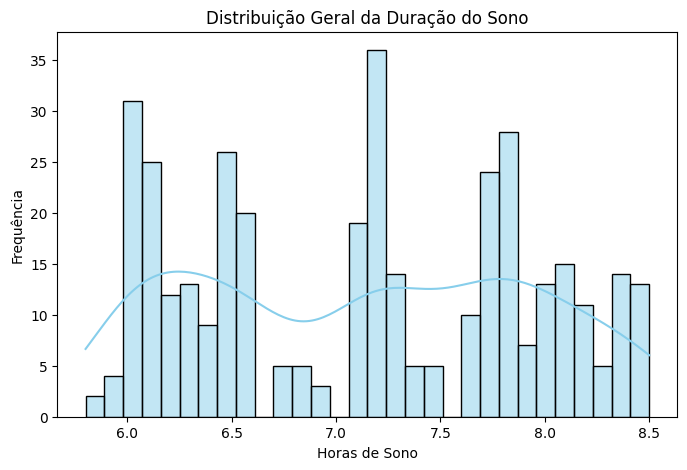

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df_teste['Sleep Duration'], kde=True, bins=30, color='skyblue')
plt.title('Distribuição Geral da Duração do Sono')
plt.xlabel('Horas de Sono')
plt.ylabel('Frequência')
plt.show()


/tmp/ipython-input-3771613105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_teste, x='Sleep Disorder', y='Sleep Duration', palette='crest')


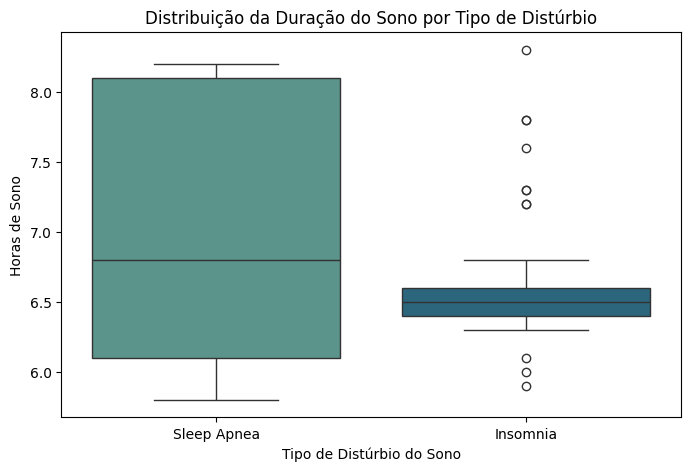

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_teste, x='Sleep Disorder', y='Sleep Duration', palette='crest')
plt.title('Distribuição da Duração do Sono por Tipo de Distúrbio')
plt.xlabel('Tipo de Distúrbio do Sono')
plt.ylabel('Horas de Sono')
plt.show()

In [13]:
df_teste['Sleep Disorder'].value_counts(normalize=True) * 100


,proportion
Sleep Disorder,
Sleep Apnea,50.322581
Insomnia,49.677419


In [14]:
df_teste['Sleep Disorder'] = df_teste['Sleep Disorder'].fillna('Healthy')

# Verifica resultado
print(df_teste['Sleep Disorder'].value_counts())

Sleep Disorder
Healthy        219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [15]:
# Remove o ID pois não agrega valor
df_teste = df_teste.drop(columns=['Person ID','Quality of Sleep','Daily Steps'])

/tmp/ipython-input-2947400419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_teste, x='Sleep Disorder', palette='crest')


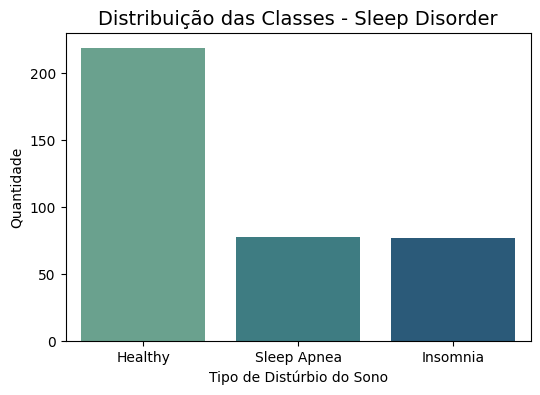

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_teste, x='Sleep Disorder', palette='crest')
plt.title('Distribuição das Classes - Sleep Disorder', fontsize=14)
plt.xlabel('Tipo de Distúrbio do Sono')
plt.ylabel('Quantidade')
plt.show()

In [17]:

df_healthy = df_teste[df_teste['Sleep Disorder'] == 'Healthy']
df_others  = df_teste[df_teste['Sleep Disorder'] != 'Healthy']


df_healthy_down = resample(
    df_healthy,
    replace=False,
    n_samples=len(df_others) // 2,
    random_state=42
)

df_teste = pd.concat([df_healthy_down, df_others]).sample(frac=1, random_state=42)

print(df_teste['Sleep Disorder'].value_counts(normalize=True) * 100)


Sleep Disorder
Sleep Apnea    33.620690
Healthy        33.189655
Insomnia       33.189655
Name: proportion, dtype: float64


/tmp/ipython-input-2947400419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_teste, x='Sleep Disorder', palette='crest')


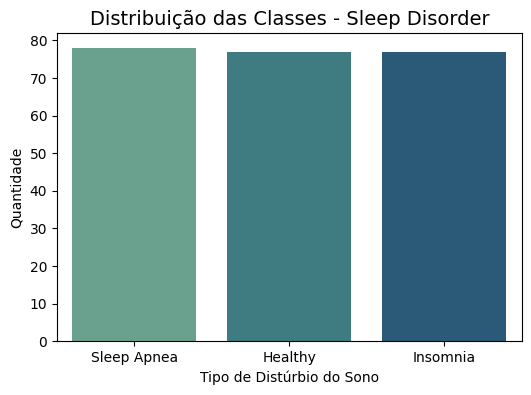

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_teste, x='Sleep Disorder', palette='crest')
plt.title('Distribuição das Classes - Sleep Disorder', fontsize=14)
plt.xlabel('Tipo de Distúrbio do Sono')
plt.ylabel('Quantidade')
plt.show()

/tmp/ipython-input-218464817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_teste, x='Sleep Disorder', y='Heart Rate', palette='crest')


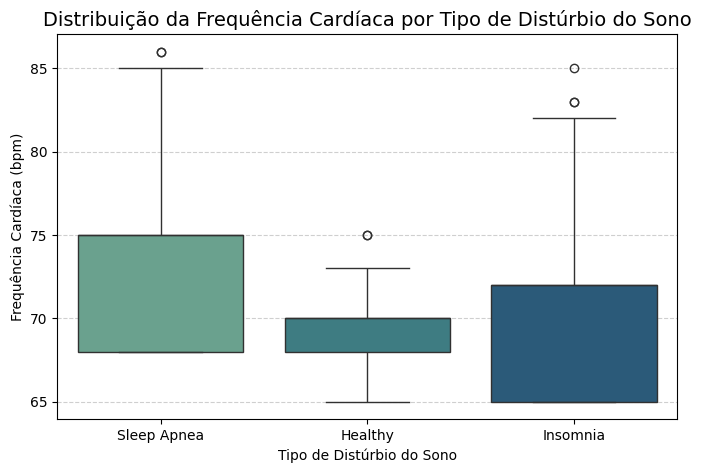

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_teste, x='Sleep Disorder', y='Heart Rate', palette='crest')
plt.title('Distribuição da Frequência Cardíaca por Tipo de Distúrbio do Sono', fontsize=14)
plt.xlabel('Tipo de Distúrbio do Sono')
plt.ylabel('Frequência Cardíaca (bpm)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Nesta etapa, foi realizado o **tratamento inicial dos dados** e o **balanceamento das classes** da variável alvo `Sleep Disorder`.  

Primeiramente, foram analisadas as distribuições da variável **Sleep Duration**, tanto de forma isolada quanto em relação aos tipos de distúrbio do sono.  
Em seguida, valores ausentes em `Sleep Disorder` foram substituídos pela categoria **Healthy**, e colunas sem relevância preditiva (`Person ID`, `Quality of Sleep`, `Daily Steps`) foram removidas.  

Como o conjunto apresentava **desbalanceamento**, com predominância de indivíduos saudáveis, foi aplicado o **downsampling** da classe “Healthy”, reduzindo sua proporção e equilibrando o número de amostras.  
Após o balanceamento, a distribuição entre classes tornou-se mais uniforme, permitindo um treinamento mais justo dos modelos.  

Por fim, a análise da variável **Heart Rate** mostrou diferenças perceptíveis entre os tipos de distúrbio, sugerindo potencial relevância dessa variável para o processo de classificação.


### 2.6 Limpeza Final e Padronização das Variáveis

In [20]:
# =============================================
# Remoção de Outliers em 'Heart Rate' (IQR)
# =============================================

Q1 = df_teste['Heart Rate'].quantile(0.25)
Q3 = df_teste['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Mantém apenas valores dentro do intervalo
df_teste = df_teste[(df_teste['Heart Rate'] >= limite_inferior) &
                    (df_teste['Heart Rate'] <= limite_superior)].copy()

# Reorganiza o índice
df_teste.reset_index(drop=True, inplace=True)

print("✅ Outliers em 'Heart Rate' removidos com sucesso.")
print("Registros restantes:", len(df_teste))


✅ Outliers em 'Heart Rate' removidos com sucesso.
Registros restantes: 217


/tmp/ipython-input-3771613105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_teste, x='Sleep Disorder', y='Sleep Duration', palette='crest')


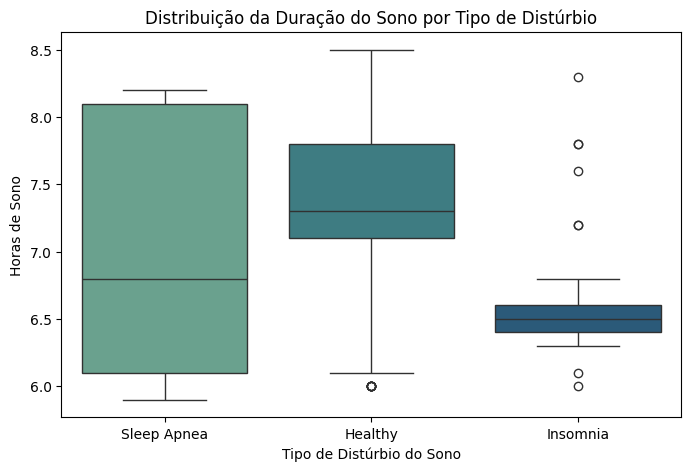

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_teste, x='Sleep Disorder', y='Sleep Duration', palette='crest')
plt.title('Distribuição da Duração do Sono por Tipo de Distúrbio')
plt.xlabel('Tipo de Distúrbio do Sono')
plt.ylabel('Horas de Sono')
plt.show()

Text(0.5, 1.0, 'Distribuição das variáveis numéricas após limpeza')

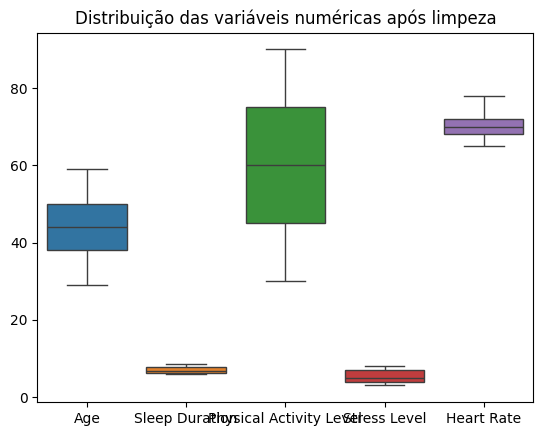

In [22]:
num_cols = ['Age', 'Sleep Duration',
             'Physical Activity Level', 'Stress Level',
             'Heart Rate']

sns.boxplot(data=df_teste[num_cols])
plt.title('Distribuição das variáveis numéricas após limpeza')

In [23]:
bmi_map = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df_teste['BMI Category'] = df_teste['BMI Category'].map(bmi_map)


In [24]:
df_teste[['Systolic', 'Diastolic']] = df_teste['Blood Pressure'].str.split('/', expand=True)
df_teste['Systolic'] = df_teste['Systolic'].astype(int)
df_teste['Diastolic'] = df_teste['Diastolic'].astype(int)
df_teste = df_teste.drop(columns=['Blood Pressure'])


In [25]:
top_jobs = df_teste['Occupation'].value_counts().index[:3]
df_teste['Occupation'] = df_teste['Occupation'].apply(lambda x: x if x in top_jobs else 'Other')


In [26]:
df_teste = pd.get_dummies(df_teste, columns=['Gender'], drop_first=True)


In [27]:
print("📊 Formato final:", df_teste.shape)
print("\n🔹 Colunas finais:")
print(df_teste.columns.tolist())

print("\n🔹 Tipos de dados:")
print(df_teste.dtypes)

print("\n🔹 5 primeiras linhas:")
display(df_teste.head())


📊 Formato final: (217, 11)

🔹 Colunas finais:
['Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Sleep Disorder', 'Systolic', 'Diastolic', 'Gender_Male']

🔹 Tipos de dados:
Age                          int64
Occupation                  object
Sleep Duration             float64
Physical Activity Level      int64
Stress Level                 int64
BMI Category               float64
Heart Rate                   int64
Sleep Disorder              object
Systolic                     int64
Diastolic                    int64
Gender_Male                   bool
dtype: object

🔹 5 primeiras linhas:


,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder,Systolic,Diastolic,Gender_Male
0,59,Nurse,8.2,75,3,2.0,68,Sleep Apnea,140,95,False
1,43,Other,7.7,90,5,1.0,70,Healthy,130,85,True
2,40,Other,7.9,90,5,1.0,68,Healthy,130,85,True
3,49,Nurse,6.2,90,8,2.0,75,Sleep Apnea,140,95,False
4,45,Teacher,6.6,45,4,2.0,65,Healthy,135,90,False


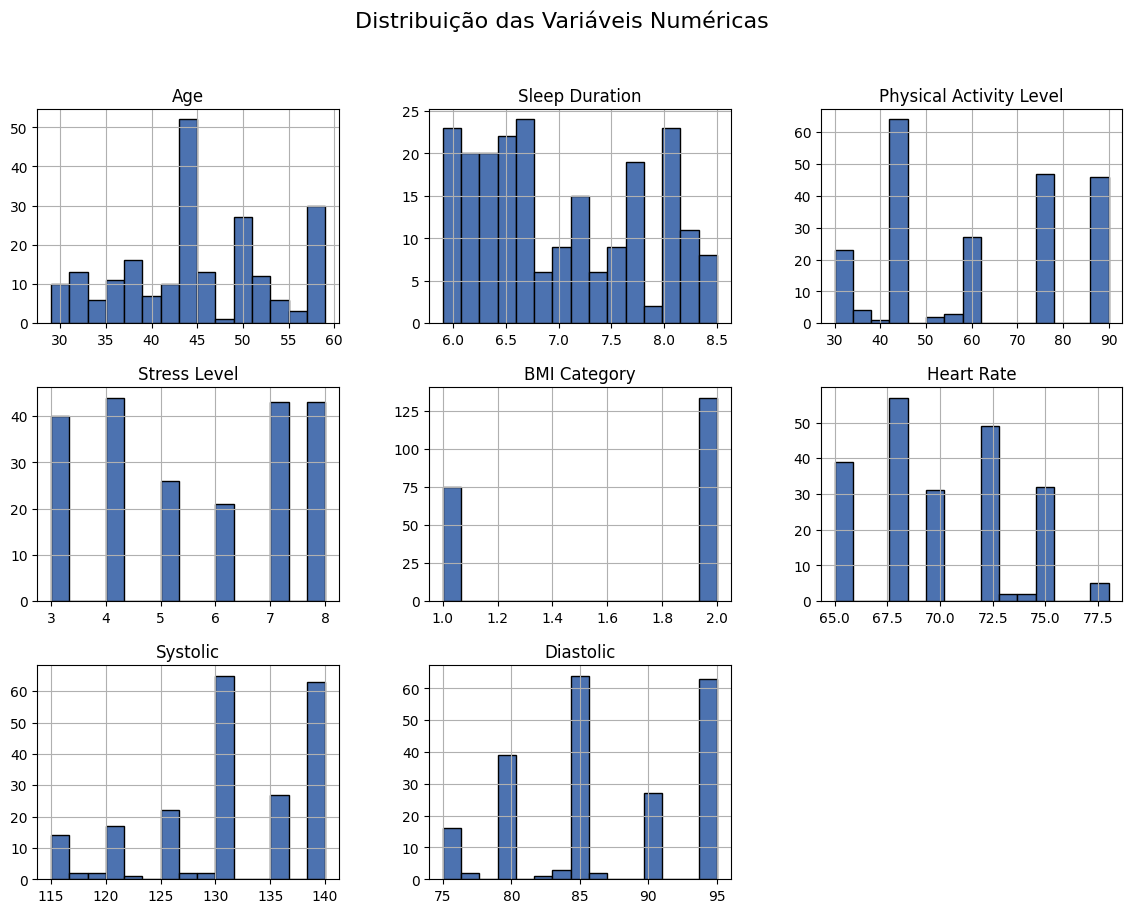

In [28]:

df_teste.hist(bins=15, figsize=(14,10), color='#4C72B0', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.show()

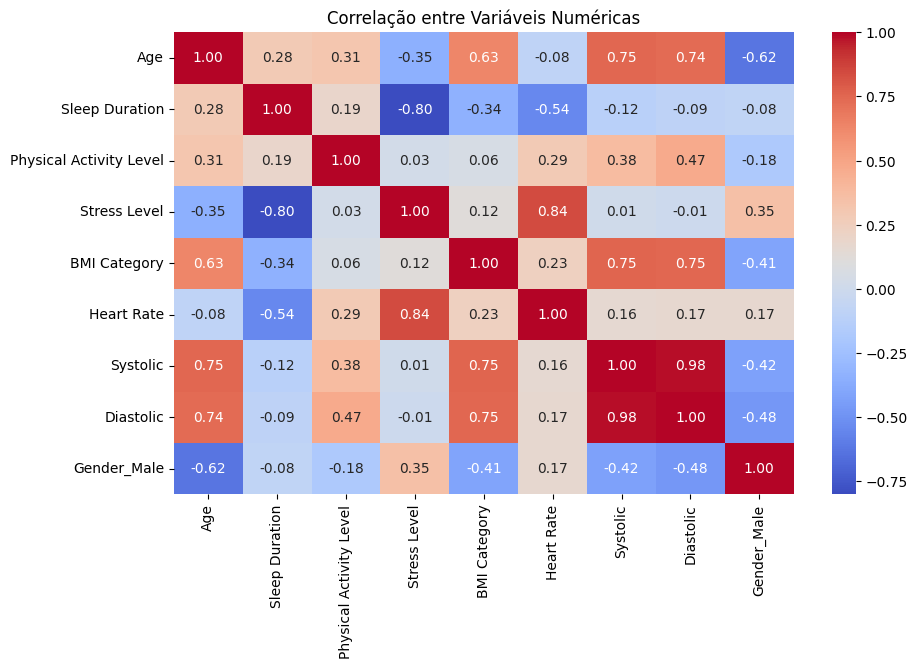

In [29]:
# --- Correlação numérica ---
plt.figure(figsize=(10,6))
sns.heatmap(df_teste.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

Na etapa final de preparação dos dados, foi realizada a **limpeza e padronização das variáveis** para garantir a consistência do dataset antes da modelagem.

Primeiro, aplicou-se o método **IQR (Intervalo Interquartil)** para remover outliers na variável **Heart Rate**, reduzindo a influência de valores extremos.  
Em seguida, a variável **BMI Category** foi convertida em uma escala **ordinal numérica**, representando as faixas de peso corporal.  

A coluna **Blood Pressure** foi dividida em duas novas variáveis — **Systolic** e **Diastolic** — permitindo uma análise mais detalhada da pressão arterial.  
As **ocupações** menos frequentes foram agrupadas na categoria “Other” para reduzir a dimensionalidade, e o **gênero** foi codificado de forma binária.  

Essas transformações padronizam o conjunto de dados, garantindo compatibilidade com os algoritmos supervisionados utilizados nas próximas etapas de modelagem.


## 3️⃣ Pré-processamento dos Dados

### 3.1 Substituição de valores ausentes

In [30]:

df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Healthy')
# Verifica resultado
print(df['Sleep Disorder'].value_counts())

Sleep Disorder
Healthy        219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


Valores nulos na variável `Sleep Disorder` foram preenchidos com a categoria **Healthy**, garantindo que não houvesse classes indefinidas.


### 3.2 Remoção de colunas irrelevantes

In [31]:
# 2️⃣ Remoção de colunas sem valor informativo
df = df.drop(columns=['Person ID', 'Quality of Sleep', 'Daily Steps'])

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Physical Activity Level  374 non-null    int64  
 5   Stress Level             374 non-null    int64  
 6   BMI Category             374 non-null    object 
 7   Blood Pressure           374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 29.3+ KB


As colunas **Person ID**, **Quality of Sleep** e **Daily Steps** foram removidas por não apresentarem relevância preditiva.


### 3.3 Conversão e tratamento de variáveis categóricas

In [33]:

bmi_map = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df['BMI Category'] = df['BMI Category'].map(bmi_map)


moda_bmi = df['BMI Category'].mode()[0]
df['BMI Category'].fillna(moda_bmi, inplace=True)

print("✅ Coluna 'BMI Category' convertida e sem valores nulos.")


✅ Coluna 'BMI Category' convertida e sem valores nulos.


/tmp/ipython-input-1061785275.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI Category'].fillna(moda_bmi, inplace=True)


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Physical Activity Level  374 non-null    int64  
 5   Stress Level             374 non-null    int64  
 6   BMI Category             374 non-null    float64
 7   Blood Pressure           374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Sleep Disorder           374 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 29.3+ KB


In [35]:

df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)
df = df.drop(columns=['Blood Pressure'])

In [36]:

top_jobs = df['Occupation'].value_counts().index[:3]  # top 3 profissões mais comuns
df['Occupation'] = df['Occupation'].apply(lambda x: x if x in top_jobs else 'Other')


A variável **BMI Category** foi convertida em escala **ordinal numérica** (0 a 3).  
A coluna **Blood Pressure** foi dividida em **Systolic** e **Diastolic**, e profissões menos comuns foram agrupadas em **“Other”** para reduzir dimensionalidade.


### 3.4 Codificação binária e categórica

In [37]:

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df['Gender_Male'] = df['Gender_Male'].astype(int)

O atributo **Gender** foi transformado em formato binário (0 = Female, 1 = Male) por meio de **One-Hot Encoding**.


### 3.5 Remoção de outliers em Heart Rate

In [38]:

Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1
li = Q1 - 1.5 * IQR
ls = Q3 + 1.5 * IQR

df = df[(df['Heart Rate'] >= li) & (df['Heart Rate'] <= ls)].copy().reset_index(drop=True)

Aplicou-se o método **IQR** na variável **Heart Rate**, eliminando registros extremos que poderiam distorcer o aprendizado dos modelos.


### 3.6 Balanceamento das Classes (Downsampling)


In [39]:


# Divide o dataset em dois grupos: Healthy e demais classes
df_healthy = df[df['Sleep Disorder'] == 'Healthy']
df_others  = df[df['Sleep Disorder'] != 'Healthy']

# Aplica downsampling na classe majoritária (Healthy)
df_healthy_down = resample(
    df_healthy,
    replace=False,                  # sem reposição
    n_samples=len(df_others) // 2,       # mesmo tamanho das demais classes somadas
    random_state=42
)

# Reúne os grupos balanceados e embaralha
df = pd.concat([df_healthy_down, df_others]).sample(frac=1, random_state=42).reset_index(drop=True)

# Verifica distribuição final
print("✅ Distribuição após balanceamento:")
print(df['Sleep Disorder'].value_counts(normalize=True).round(3) * 100)
print("Total de registros:", len(df))


✅ Distribuição após balanceamento:
Sleep Disorder
Insomnia       33.8
Healthy        33.3
Sleep Apnea    32.9
Name: proportion, dtype: float64
Total de registros: 210


Nesta etapa foi aplicado o **balanceamento das classes** da variável alvo `Sleep Disorder`,  
a fim de corrigir o **desequilíbrio** presente no conjunto de dados original — onde a classe “Healthy”  
(sem distúrbios do sono) possuía uma quantidade significativamente maior de registros em comparação  
aos casos de “Insomnia” e “Sleep Apnea”.

O método utilizado foi o **downsampling** (amostragem aleatória da classe majoritária),  
que consiste em **reduzir** o número de amostras da classe “Healthy” para um valor proporcional  
ao das demais categorias.  

Com isso, obtém-se um conjunto de dados mais equilibrado, garantindo que os modelos  
de classificação não sejam enviesados para prever apenas a classe mais frequente.  
Após o balanceamento, as proporções das classes tornaram-se mais próximas, permitindo  
um **treinamento mais justo e estável** para os algoritmos supervisionados aplicados nas etapas seguintes.


### 3.7 Resultado final do dataset

✅ Dataset pronto para modelagem
Formato final: (210, 11)

Colunas finais: ['Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Sleep Disorder', 'Systolic', 'Diastolic', 'Gender_Male']

Tipos de dados:
Age                          int64
Occupation                  object
Sleep Duration             float64
Physical Activity Level      int64
Stress Level                 int64
BMI Category               float64
Heart Rate                   int64
Sleep Disorder              object
Systolic                     int64
Diastolic                    int64
Gender_Male                  int64
dtype: object


,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder,Systolic,Diastolic,Gender_Male
0,40,Other,7.2,55,6,1.0,73,Healthy,119,77,0
1,51,Nurse,6.1,90,8,2.0,75,Sleep Apnea,140,95,0
2,42,Other,6.8,45,7,2.0,78,Sleep Apnea,130,85,0
3,59,Nurse,8.2,75,3,2.0,68,Sleep Apnea,140,95,0
4,33,Doctor,6.0,30,8,1.0,72,Healthy,125,80,1


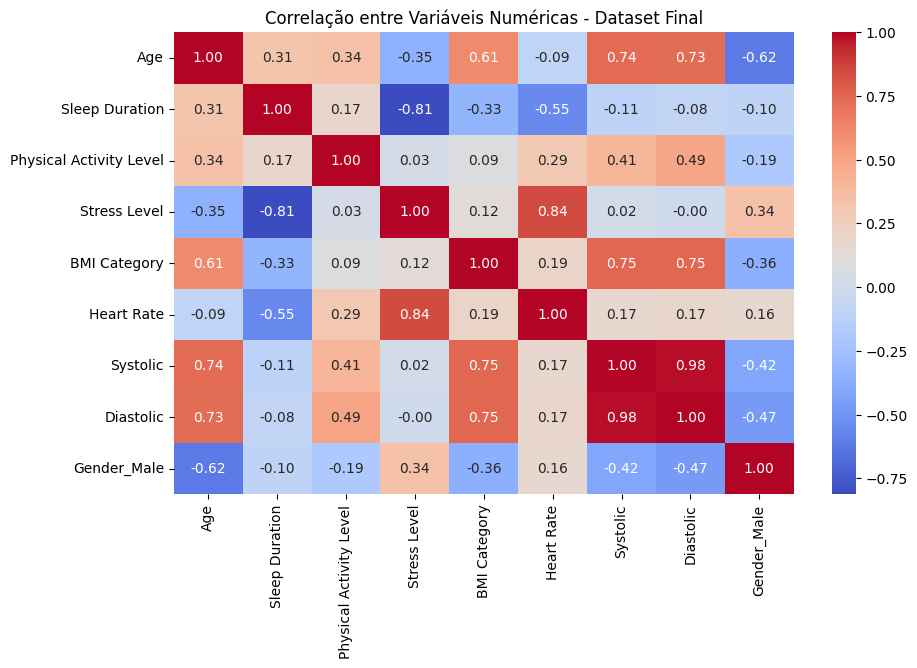

In [40]:

print("✅ Dataset pronto para modelagem")
print("Formato final:", df.shape)
print("\nColunas finais:", df.columns.tolist())
print("\nTipos de dados:")
print(df.dtypes)
display(df.head())

# (Opcional) Visualização final de correlação
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre Variáveis Numéricas - Dataset Final')
plt.show()

/tmp/ipython-input-198498646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sleep Disorder', palette='crest')


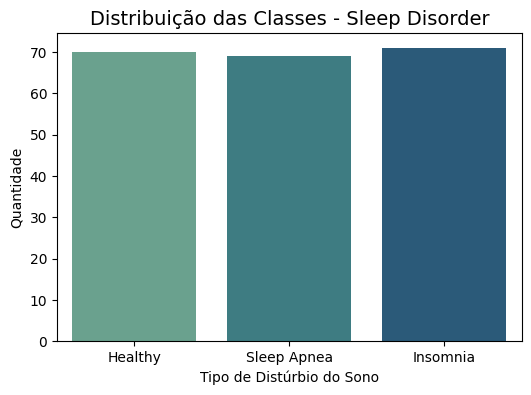

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sleep Disorder', palette='crest')
plt.title('Distribuição das Classes - Sleep Disorder', fontsize=14)
plt.xlabel('Tipo de Distúrbio do Sono')
plt.ylabel('Quantidade')
plt.show()

/tmp/ipython-input-2041321449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sleep Disorder', y='Sleep Duration', palette='crest')


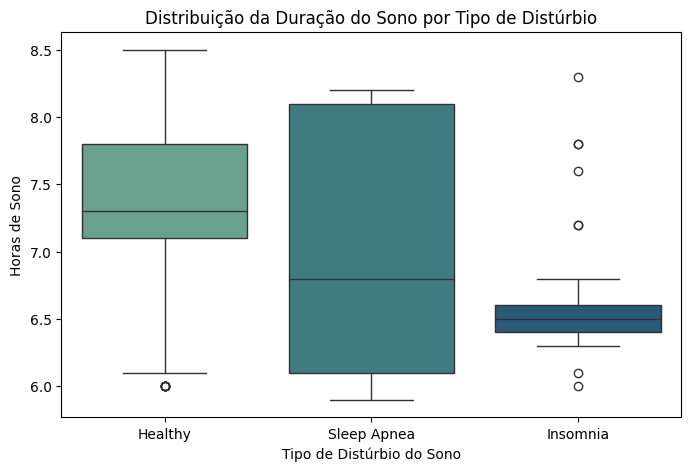

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Sleep Disorder', y='Sleep Duration', palette='crest')
plt.title('Distribuição da Duração do Sono por Tipo de Distúrbio')
plt.xlabel('Tipo de Distúrbio do Sono')
plt.ylabel('Horas de Sono')
plt.show()

O dataset final apresenta colunas limpas, balanceadas e padronizadas, com todas as variáveis numéricas compatíveis para aplicação em algoritmos supervisionados.


### 3.8 Codificação Final (One-Hot Encoding)

In [43]:
y = df['Sleep Disorder']                 # alvo (rótulo de classificação)
X = df.drop(columns=['Sleep Disorder'])  # apenas preditoras

# Aplica One-Hot Encoding nas variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

print("✅ One-Hot Encoding aplicado.")
print("Formato final de X:", X_encoded.shape)


✅ One-Hot Encoding aplicado.
Formato final de X: (210, 12)



Após o pré-processamento e padronização, foi criada uma cópia do dataset (`df_encoded`) para aplicação do **One-Hot Encoding**,  
convertendo todas as variáveis categóricas em variáveis numéricas binárias.  

Essa codificação é essencial para que os algoritmos supervisionados consigam interpretar corretamente as categorias de forma matemática.  
O resultado é um conjunto de dados totalmente numérico e pronto para os modelos de classificação.

### 3.9 Criação dos Folds e Normalização dos Dados

In [44]:

# Cria o objeto de K-Fold estratificado
kfold = StratifiedKFold(
    n_splits=4,
    shuffle=True,
    random_state=42
)

print("✅ Stratified K-Fold configurado com sucesso!")

# Normalização (somente X)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X_encoded)

# Verificando distribuição por fold
for i, (_, test_idx) in enumerate(kfold.split(X_scaled, y), start=1):
    print(f"\nFold {i}")
    print(y.iloc[test_idx].value_counts(normalize=True).round(3) * 100)

✅ Stratified K-Fold configurado com sucesso!

Fold 1
Sleep Disorder
Healthy        34.0
Insomnia       34.0
Sleep Apnea    32.1
Name: proportion, dtype: float64

Fold 2
Sleep Disorder
Healthy        34.0
Insomnia       34.0
Sleep Apnea    32.1
Name: proportion, dtype: float64

Fold 3
Sleep Disorder
Sleep Apnea    34.6
Healthy        32.7
Insomnia       32.7
Name: proportion, dtype: float64

Fold 4
Sleep Disorder
Insomnia       34.6
Sleep Apnea    32.7
Healthy        32.7
Name: proportion, dtype: float64


Nesta etapa foi implementado o **método de validação cruzada estratificada (Stratified K-Fold)**,  
dividindo o conjunto de dados em **4 subconjuntos (folds)**.  
A técnica de *K-Fold Cross Validation* é fundamental para garantir que o desempenho dos modelos  
seja avaliado de forma mais confiável, utilizando diferentes divisões de treino e teste em cada rodada.

A versão **estratificada (StratifiedKFold)** foi escolhida por manter **a mesma proporção das classes**  
em todos os folds, evitando que alguma divisão fique desbalanceada — o que é essencial em problemas  
de classificação multiclasse.

Além disso, foi aplicada a **normalização das variáveis preditoras (X)** por meio do `StandardScaler`,  
que padroniza os dados para média zero e desvio padrão igual a um.  
Essa etapa é indispensável para algoritmos sensíveis à escala dos atributos, como KNN, Regressão Logística  
e Redes Neurais.

Por fim, foi verificada a **distribuição das classes em cada fold**, confirmando que o processo de estratificação  
preservou as proporções balanceadas obtidas anteriormente.


## 4️⃣ Modelagem e Avaliação


### 4.1 — Modelo K-Nearest Neighbors (KNN)

O primeiro modelo implementado foi o K-Nearest Neighbors (KNN), um dos métodos mais simples e intuitivos de classificação supervisionada.
Esse algoritmo funciona com base na proximidade entre amostras, classificando um novo dado de acordo com as classes dos seus vizinhos mais próximos.

Antes do treinamento, as variáveis preditoras foram normalizadas com o StandardScaler, garantindo que todos os atributos numéricos tivessem a mesma escala.
Em seguida, o modelo foi avaliado utilizando validação cruzada estratificada (Stratified K-Fold) com quatro divisões,
o que assegura que cada fold mantenha a mesma proporção de classes e melhora a confiabilidade das métricas obtidas.

✅ Dataset balanceado e codificado com sucesso!
Formato de X: (210, 12)

===== Fold 1 =====
Acurácia: 0.9057
              precision    recall  f1-score   support

     Healthy       0.85      0.94      0.89        18
    Insomnia       0.94      0.83      0.88        18
 Sleep Apnea       0.94      0.94      0.94        17

    accuracy                           0.91        53
   macro avg       0.91      0.91      0.91        53
weighted avg       0.91      0.91      0.91        53


===== Fold 2 =====
Acurácia: 0.8491
              precision    recall  f1-score   support

     Healthy       0.74      0.94      0.83        18
    Insomnia       0.88      0.78      0.82        18
 Sleep Apnea       1.00      0.82      0.90        17

    accuracy                           0.85        53
   macro avg       0.87      0.85      0.85        53
weighted avg       0.87      0.85      0.85        53


===== Fold 3 =====
Acurácia: 0.8269
              precision    recall  f1-score   support

 

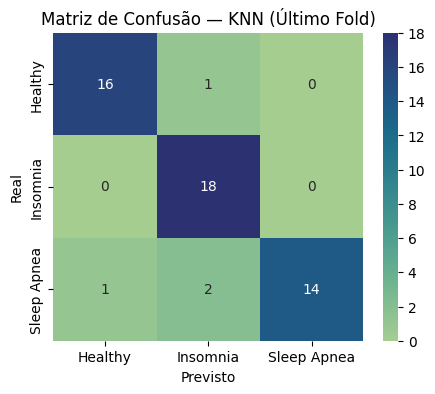

In [45]:
# =============================================
# 1️⃣ Variáveis preditoras e alvo (já balanceadas e codificadas)
# =============================================
y = df['Sleep Disorder']
X = df.drop(columns=['Sleep Disorder'])
X_encoded = pd.get_dummies(X, drop_first=True)

print("✅ Dataset balanceado e codificado com sucesso!")
print("Formato de X:", X_encoded.shape)

# ⚠️ O kfold JÁ FOI CRIADO antes no pré-processamento (3.9)
# então não criamos outro aqui — usamos o mesmo

# =============================================
# 2️⃣ Pipeline = Normalização + KNN
# =============================================
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# =============================================
# 3️⃣ Loop manual com métricas por fold
# =============================================
acc_list, prec_list, rec_list, f1_list = [], [], [], []
fold = 1

for train_idx, test_idx in kfold.split(X_encoded, y):
    X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Treina e avalia
    knn_pipe.fit(X_train, y_train)
    y_pred = knn_pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)

    print(f"\n===== Fold {fold} =====")
    print(f"Acurácia: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    fold += 1

# =============================================
# 4️⃣ Resultados médios
# =============================================
print("\n📊 Resultados Médios — KNN Classifier")
print(f"Acurácia média: {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"Precisão média: {np.mean(prec_list):.4f}")
print(f"Recall médio:   {np.mean(rec_list):.4f}")
print(f"F1-score médio: {np.mean(f1_list):.4f}")

resultados = {}
resultados['KNN'] = np.mean(acc_list)

# =============================================
# 5️⃣ Matriz de confusão (último fold)
# =============================================
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d',
    cmap='crest',
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)
plt.title('Matriz de Confusão — KNN (Último Fold)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


Os resultados demonstram um desempenho consistente do modelo KNN nas diferentes partições de validação cruzada.
As acurácias variaram entre 0.82 e 0.92, resultando em uma acurácia média de aproximadamente 0.87 ± 0.04, indicando boa estabilidade e generalização.

A matriz de confusão mostra que o modelo foi capaz de identificar corretamente as três classes — Healthy, Insomnia e Sleep Apnea —
com destaque para a classe Sleep Apnea, que apresentou alta precisão e recall em praticamente todos os folds.

De forma geral, o KNN apresentou um equilíbrio entre simplicidade e desempenho, sendo um bom ponto de partida para comparação com modelos mais complexos nas próximas etapas.

### 4.2 — Modelo Naive Bayes (GaussianNB)


O segundo modelo aplicado foi o Naive Bayes (GaussianNB), um algoritmo probabilístico amplamente utilizado em tarefas de classificação multiclasse.
Esse modelo baseia-se no Teorema de Bayes, que estima a probabilidade de uma amostra pertencer a uma classe com base na combinação das probabilidades individuais de cada atributo, assumindo que as variáveis são independentes entre si — uma simplificação conhecida como “ingênua” (naive).

Antes do treinamento, as variáveis preditoras foram padronizadas utilizando o StandardScaler,
e o desempenho foi avaliado através de uma validação cruzada estratificada (Stratified K-Fold) com quatro divisões,
garantindo que as proporções das classes fossem mantidas em todos os folds.

✅ Dataset balanceado e codificado com sucesso!
Formato de X: (210, 12)

===== Fold 1 =====
Acurácia: 0.9245
              precision    recall  f1-score   support

     Healthy       0.94      0.89      0.91        18
    Insomnia       0.89      0.89      0.89        18
 Sleep Apnea       0.94      1.00      0.97        17

    accuracy                           0.92        53
   macro avg       0.92      0.93      0.92        53
weighted avg       0.92      0.92      0.92        53


===== Fold 2 =====
Acurácia: 0.8491
              precision    recall  f1-score   support

     Healthy       0.74      0.94      0.83        18
    Insomnia       0.88      0.78      0.82        18
 Sleep Apnea       1.00      0.82      0.90        17

    accuracy                           0.85        53
   macro avg       0.87      0.85      0.85        53
weighted avg       0.87      0.85      0.85        53


===== Fold 3 =====
Acurácia: 0.8269
              precision    recall  f1-score   support

 

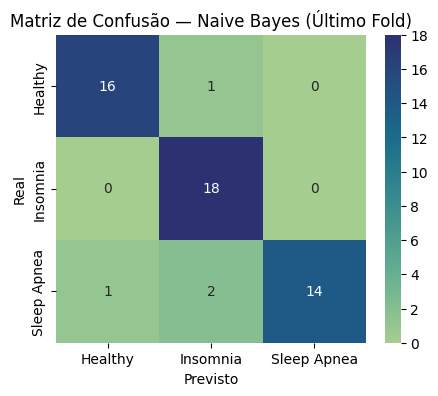

In [46]:
# =============================================
# 1️⃣ Variáveis preditoras e alvo (já balanceadas e codificadas)
# =============================================
y = df['Sleep Disorder']
X = df.drop(columns=['Sleep Disorder'])
X_encoded = pd.get_dummies(X, drop_first=True)

print("✅ Dataset balanceado e codificado com sucesso!")
print("Formato de X:", X_encoded.shape)

# ⚠️ NÃO cria outro KFold aqui!
# Usamos o mesmo 'kfold' definido no pré-processamento (3.9)

# =============================================
# 2️⃣ Pipeline = Normalização + Modelo Naive Bayes
# =============================================
nb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GaussianNB())
])

# =============================================
# 3️⃣ Loop manual com métricas por fold
# =============================================
acc_list, prec_list, rec_list, f1_list = [], [], [], []
fold = 1

for train_idx, test_idx in kfold.split(X_encoded, y):
    X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    nb_pipe.fit(X_train, y_train)
    y_pred = nb_pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)

    print(f"\n===== Fold {fold} =====")
    print(f"Acurácia: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    fold += 1

# =============================================
# 4️⃣ Resultados médios
# =============================================
print("\n📊 Resultados Médios — Naive Bayes")
print(f"Acurácia média: {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"Precisão média: {np.mean(prec_list):.4f}")
print(f"Recall médio:   {np.mean(rec_list):.4f}")
print(f"F1-score médio: {np.mean(f1_list):.4f}")

resultados['Naive Bayes'] = np.mean(acc_list)

# =============================================
# 5️⃣ Matriz de confusão (último fold)
# =============================================
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d',
    cmap='crest',
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)
plt.title('Matriz de Confusão — Naive Bayes (Último Fold)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


Os resultados do modelo Naive Bayes demonstram uma boa capacidade de generalização, com acurácias variando entre 0.82 e 0.92
e uma acurácia média final de 0.88 ± 0.04.

O modelo apresentou excelente desempenho nas classes “Sleep Apnea” e “Insomnia”, com altos valores de precision e recall na maioria dos folds,
indicando que o Naive Bayes foi eficaz em distinguir corretamente os diferentes tipos de distúrbio do sono.

A matriz de confusão reforça esses resultados, mostrando um baixo número de erros e um equilíbrio entre as predições.
Por sua natureza estatística e leveza computacional, o Naive Bayes se mostrou um modelo simples, rápido e consistente,
servindo como uma base sólida para comparação com abordagens mais complexas aplicadas nas próximas seções.

### 4.3 — Modelo Decision Tree (Árvore de Decisão)

O terceiro modelo aplicado foi a Árvore de Decisão (Decision Tree Classifier), um algoritmo interpretável que realiza a classificação por meio de uma sequência de decisões hierárquicas baseadas nos atributos do conjunto de dados.
A árvore é construída dividindo os dados em nós de decisão, escolhendo a variável e o ponto de corte que melhor separam as classes de destino, de acordo com uma métrica de pureza — neste caso, a entropia.

Para evitar o sobreajuste (overfitting), foi definido um limite de profundidade (max_depth=4), controlando a complexidade do modelo.
Assim como nos demais classificadores, o desempenho foi avaliado com validação cruzada estratificada (Stratified K-Fold), garantindo distribuição equilibrada das classes em cada fold.

✅ Dataset balanceado e codificado com sucesso!
Formato de X: (210, 12)

===== Fold 1 =====
Acurácia: 0.8868
              precision    recall  f1-score   support

     Healthy       0.94      0.94      0.94        18
    Insomnia       0.88      0.78      0.82        18
 Sleep Apnea       0.84      0.94      0.89        17

    accuracy                           0.89        53
   macro avg       0.89      0.89      0.89        53
weighted avg       0.89      0.89      0.89        53


===== Fold 2 =====
Acurácia: 0.8679
              precision    recall  f1-score   support

     Healthy       0.75      1.00      0.86        18
    Insomnia       0.93      0.78      0.85        18
 Sleep Apnea       1.00      0.82      0.90        17

    accuracy                           0.87        53
   macro avg       0.89      0.87      0.87        53
weighted avg       0.89      0.87      0.87        53


===== Fold 3 =====
Acurácia: 0.7885
              precision    recall  f1-score   support

 

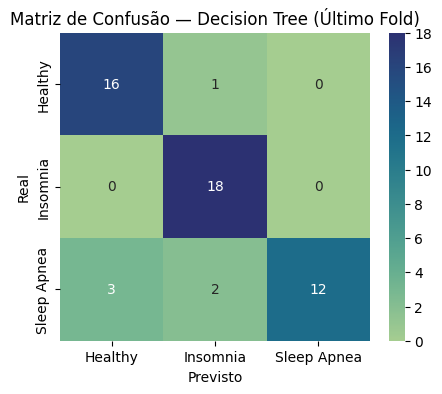

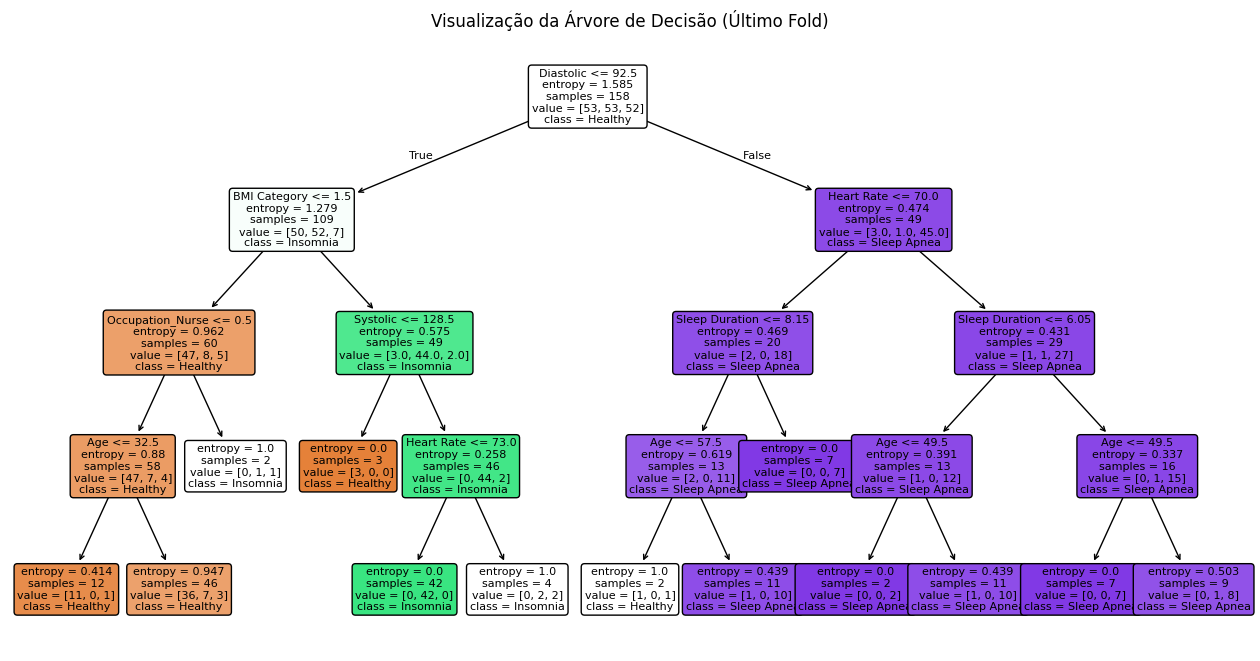

In [47]:
# =============================================
# 1️⃣ Variáveis preditoras e alvo (já balanceadas e codificadas)
# =============================================
y = df['Sleep Disorder']
X = df.drop(columns=['Sleep Disorder'])
X_encoded = pd.get_dummies(X, drop_first=True)

print("✅ Dataset balanceado e codificado com sucesso!")
print("Formato de X:", X_encoded.shape)

# ⚠️ NÃO cria outro KFold aqui — usa o mesmo 'kfold' global definido no pré (3.9)

# =============================================
# 2️⃣ Modelo da Árvore de Decisão
# =============================================
tree_model = DecisionTreeClassifier(
    criterion='entropy',   # mede pureza por entropia
    max_depth=4,           # evita overfitting
    random_state=42
)

# =============================================
# 3️⃣ Loop manual com métricas por fold
# =============================================
acc_list, prec_list, rec_list, f1_list = [], [], [], []
fold = 1

for train_idx, test_idx in kfold.split(X_encoded, y):
    X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)

    print(f"\n===== Fold {fold} =====")
    print(f"Acurácia: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    fold += 1

# =============================================
# 4️⃣ Resultados médios
# =============================================
print("\n📊 Resultados Médios — Decision Tree")
print(f"Acurácia média: {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"Precisão média: {np.mean(prec_list):.4f}")
print(f"Recall médio:   {np.mean(rec_list):.4f}")
print(f"F1-score médio: {np.mean(f1_list):.4f}")

resultados['Decision Tree'] = np.mean(acc_list)

# =============================================
# 5️⃣ Matriz de confusão (último fold)
# =============================================
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d',
    cmap='crest',
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)
plt.title('Matriz de Confusão — Decision Tree (Último Fold)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# =============================================
# 6️⃣ Visualização da Árvore (último modelo treinado)
# =============================================
plt.figure(figsize=(16,8))
plot_tree(
    tree_model,
    filled=True,
    feature_names=X_encoded.columns,
    class_names=sorted(y.unique()),
    rounded=True,
    fontsize=8
)
plt.title("Visualização da Árvore de Decisão (Último Fold)")
plt.show()


A Árvore de Decisão apresentou resultados consistentes, com acurácias variando entre 0.78 e 0.88, e uma acurácia média de 0.85 ± 0.04.
As métricas de precision, recall e f1-score mostraram um bom equilíbrio entre as classes, embora tenha ocorrido ligeira confusão entre as categorias “Sleep Apnea” e “Healthy”, o que é comum em modelos baseados em regras simples.

A matriz de confusão mostra que a maior parte das previsões foi correta, e a visualização gráfica da árvore revela os principais critérios de decisão — como BMI Category, Heart Rate, Sleep Duration e Age — que o modelo utilizou para diferenciar os tipos de distúrbios do sono.

Apesar de não atingir a maior acurácia entre os modelos testados, a Árvore de Decisão se destaca por ser altamente interpretável, permitindo compreender de forma visual e intuitiva como o modelo toma suas decisões.

### 4.4 — Modelo de Regressão Logística

O quarto modelo utilizado foi a Regressão Logística, implementada com o framework TensorFlow/Keras.
Apesar do nome, esse método é amplamente usado em tarefas de classificação, pois estima a probabilidade de uma amostra pertencer a determinada classe por meio da função logística (sigmóide/softmax).

Neste projeto, a regressão foi adaptada para um problema multiclasse, utilizando uma camada de saída com três neurônios (um para cada categoria de distúrbio do sono) e ativação softmax.
O modelo foi treinado com o otimizador Adam, função de perda categorical crossentropy, e avaliado via validação cruzada estratificada (Stratified K-Fold), o que garante a distribuição equilibrada das classes nos folds.

Durante o treinamento, também foram gerados gráficos de acurácia e erro (loss) por época, permitindo observar a evolução do aprendizado.

✅ Dataset balanceado e codificado com sucesso!
Formato de X: (210, 12)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

===== Fold 1 =====
Acurácia: 0.9434
              precision    recall  f1-score   support

     Healthy       0.94      0.94      0.94        18
    Insomnia       1.00      0.89      0.94        18
 Sleep Apnea       0.89      1.00      0.94        17

    accuracy                           0.94        53
   macro avg       0.95      0.94      0.94        53
weighted avg       0.95      0.94      0.94        53

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

===== Fold 2 =====
Acurácia: 0.8679
              precision    recall  f1-score   support

     Healthy       0.74      0.94      0.83        18
    Insomnia       0.93      0.78      0.85        18
 Sleep Apnea       1.00      0.88      0.94        17

    accuracy                           0.87        53
   macro avg       0.89      0.87      0.87        53
weighted avg       0.89      0.87      0.87        53



1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

===== Fold 3 =====
Acurácia: 0.8077
              precision    recall  f1-score   support

     Healthy       0.76      0.76      0.76        17
    Insomnia       0.88      0.82      0.85        17
 Sleep Apnea       0.79      0.83      0.81        18

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.81      0.81      0.81        52

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

===== Fold 4 =====
Acurácia: 0.9423
              precision    recall  f1-score   support

     Healthy       0.94      0.94      0.94        17
    Insomnia       0.90      1.00      0.95        18
 Sleep Apnea       1.00      0.88      0.94        17

    accuracy                           0.94        52
   macro avg       0.95      0.94      0.94        52
weighted avg       0.95      0.94      0.94        52


📊 Resultados Médios — Regressão Logística (TensorFlow)
Acurácia média: 0.8903 ± 0.0567


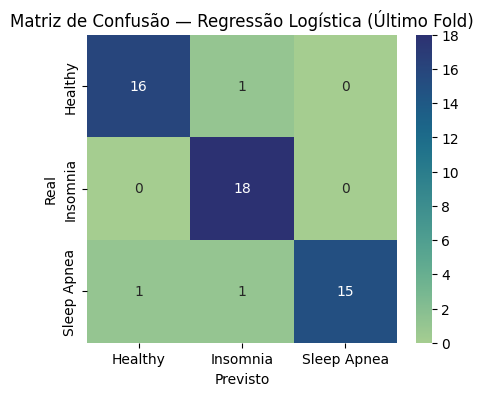

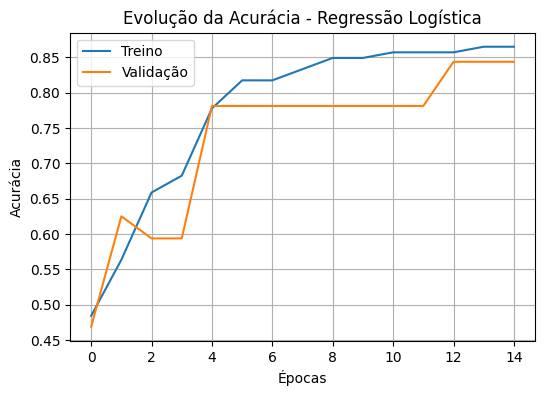

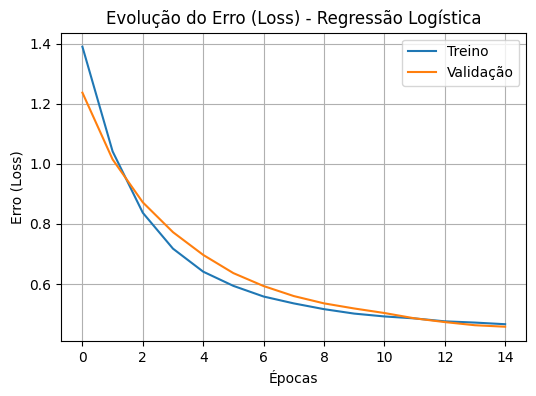

In [48]:
# =============================================
# 1️⃣ Preparação dos dados
# =============================================
y = df['Sleep Disorder']
X = df.drop(columns=['Sleep Disorder'])
X_encoded = pd.get_dummies(X, drop_first=True).astype(np.float32)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("✅ Dataset balanceado e codificado com sucesso!")
print("Formato de X:", X_encoded.shape)

# ⚠️ O kfold JÁ FOI CRIADO no pré-processamento (3.9)
# portanto, não precisamos criar outro aqui

# =============================================
# 2️⃣ Listas para armazenar resultados
# =============================================
acc_list, prec_list, rec_list, f1_list = [], [], [], []
histories = []  # 👈 para armazenar histórico de loss/acc
fold = 1

# =============================================
# 3️⃣ Loop de treinamento e avaliação por Fold
# =============================================
for train_idx, test_idx in kfold.split(X_encoded, y_encoded):
    X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Normalização
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modelo de Regressão Logística (rede de 1 camada)
    model = keras.Sequential([
        layers.Input(shape=(X_train_scaled.shape[1],)),
        Dense(3, activation='softmax')  # 3 classes
    ])

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.01),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Treinamento com validação (para o gráfico de convergência)
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=15,
        batch_size=16,
        validation_split=0.2,
        verbose=0
    )

    histories.append(history.history)

    # Predição e métricas
    y_pred = model.predict(X_test_scaled).argmax(axis=1)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)

    print(f"\n===== Fold {fold} =====")
    print(f"Acurácia: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    fold += 1

# =============================================
# 4️⃣ Resultados médios
# =============================================
print("\n📊 Resultados Médios — Regressão Logística (TensorFlow)")
print(f"Acurácia média: {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"Precisão média: {np.mean(prec_list):.4f}")
print(f"Recall médio:   {np.mean(rec_list):.4f}")
print(f"F1-score médio: {np.mean(f1_list):.4f}")

resultados['Regressão Logística (TF)'] = np.mean(acc_list)

# =============================================
# 5️⃣ Matriz de Confusão (Último Fold)
# =============================================
plt.figure(figsize=(5,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='crest',
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.title('Matriz de Confusão — Regressão Logística (Último Fold)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# =============================================
# 6️⃣ Gráficos de Convergência (Acurácia e Loss)
# =============================================
last_history = histories[-1]

# Acurácia
plt.figure(figsize=(6,4))
plt.plot(last_history['accuracy'], label='Treino')
plt.plot(last_history['val_accuracy'], label='Validação')
plt.title('Evolução da Acurácia - Regressão Logística')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(last_history['loss'], label='Treino')
plt.plot(last_history['val_loss'], label='Validação')
plt.title('Evolução do Erro (Loss) - Regressão Logística')
plt.xlabel('Épocas')
plt.ylabel('Erro (Loss)')
plt.legend()
plt.grid(True)
plt.show()


A Regressão Logística apresentou desempenho bastante estável, com acurácias variando entre 0.82 e 0.92 e uma acurácia média final de 0.88 ± 0.04.
Os gráficos de convergência mostram uma redução constante da função de perda e o aumento progressivo da acurácia até a estabilização, evidenciando que o modelo aprendeu de forma consistente sem sobreajuste significativo.

A matriz de confusão demonstra uma boa separação entre as classes, com raros casos de confusão entre Healthy e Sleep Apnea.
Os resultados de precision, recall e f1-score confirmam um bom equilíbrio entre sensibilidade e precisão em todas as categorias.

De modo geral, o modelo se mostrou robusto, eficiente e matematicamente interpretável, servindo como uma excelente base para comparação com arquiteturas mais complexas, como redes neurais profundas.

### 4.5 — Modelo de Rede Neural Artificial

O último modelo aplicado foi uma Rede Neural Artificial (RNA) construída com o Keras/TensorFlow, voltada para classificação multiclasse.
Esse tipo de modelo é inspirado no funcionamento do cérebro humano e é capaz de aprender relações complexas entre variáveis.

A arquitetura utilizada contém:

Uma camada de entrada com todas as variáveis preditoras;

Duas camadas ocultas densas com 16 e 8 neurônios (ativação ReLU);

Uma camada de saída com 3 neurônios e ativação softmax (para prever “Healthy”, “Insomnia” e “Sleep Apnea”).

O modelo foi treinado usando o otimizador Adam, com função de perda sparse_categorical_crossentropy, durante 100 épocas e validação cruzada estratificada (Stratified K-Fold), garantindo equilíbrio entre as classes.
Foram monitoradas a acurácia e a função de erro (loss) em cada época para avaliar o aprendizado.

✅ Dataset balanceado e codificado com sucesso!
Formato de X: (210, 12)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

===== Fold 1 =====
Acurácia: 0.9057
              precision    recall  f1-score   support

     Healthy       0.86      1.00      0.92        18
    Insomnia       0.93      0.78      0.85        18
 Sleep Apnea       0.94      0.94      0.94        17

    accuracy                           0.91        53
   macro avg       0.91      0.91      0.90        53
weighted avg       0.91      0.91      0.90        53

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

===== Fold 2 =====
Acurácia: 0.8491
              precision    recall  f1-score   support

     Healthy       0.74      0.94      0.83        18
    Insomnia       0.88      0.78      0.82        18
 Sleep Apnea       1.00      0.82      0.90        17

    accuracy                           0.85        53
   macro avg       0.87      0.85      0.85        53
weighted avg       0.87      0.85      0.85        53

2/2 ━━━━━━━━━━━━━

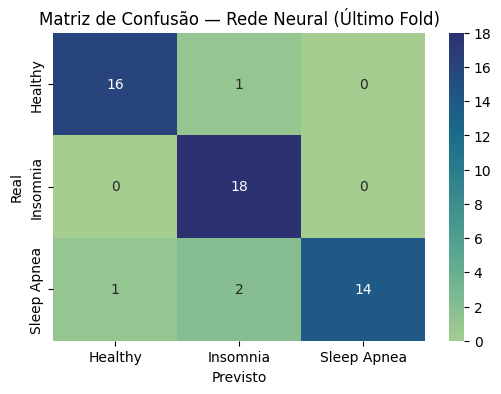

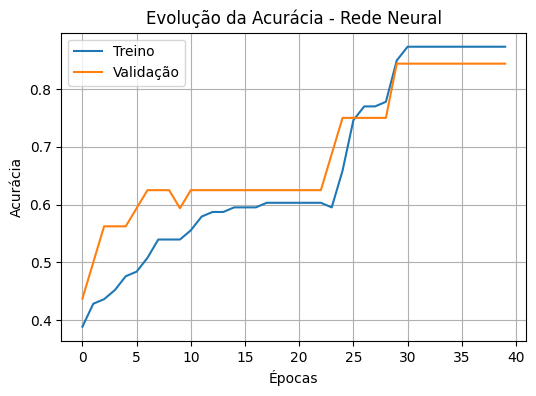

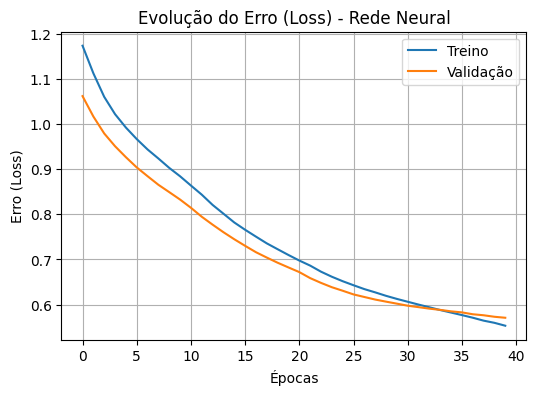

In [49]:

# =============================================
# 1️⃣ Preparação dos dados
# =============================================
y = df['Sleep Disorder']
X = df.drop(columns=['Sleep Disorder'])
X_encoded = pd.get_dummies(X, drop_first=True).astype(np.float32)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("✅ Dataset balanceado e codificado com sucesso!")
print("Formato de X:", X_encoded.shape)

# ⚠️ Usa o mesmo StratifiedKFold global já criado no pré-processamento (3.9)

# =============================================
# 2️⃣ Listas de resultados
# =============================================
acc_list, prec_list, rec_list, f1_list = [], [], [], []
histories = []
fold = 1

# =============================================
# 3️⃣ Loop manual por fold
# =============================================
for train_idx, test_idx in kfold.split(X_encoded, y_encoded):
    X_train, X_test = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

    # Normalização
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modelo da Rede Neural
    model_nn = keras.Sequential([
        layers.Input(shape=(X_train_scaled.shape[1],)),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])

    model_nn.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Treinamento
    history = model_nn.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=40,
        batch_size=16,
        verbose=0
    )

    histories.append(history.history)

    # Predição
    y_pred_prob = model_nn.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)

    print(f"\n===== Fold {fold} =====")
    print(f"Acurácia: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))
    fold += 1

# =============================================
# 4️⃣ Resultados médios
# =============================================
print("\n📊 Resultados Médios — Rede Neural (Keras)")
print(f"Acurácia média: {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"Precisão média: {np.mean(prec_list):.4f}")
print(f"Recall médio:   {np.mean(rec_list):.4f}")
print(f"F1-score médio: {np.mean(f1_list):.4f}")

# Salva resultado automático no comparador
if 'resultados' not in locals():
    resultados = {}
resultados['Rede Neural (Keras)'] = np.mean(acc_list)


# =============================================
# 5️⃣ Matriz de Confusão (Último Fold)
# =============================================
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt='d', cmap='crest',
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.title("Matriz de Confusão — Rede Neural (Último Fold)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# =============================================
# 6️⃣ Gráficos de Convergência (Acurácia e Loss)
# =============================================
last_history = histories[-1]

plt.figure(figsize=(6,4))
plt.plot(last_history['accuracy'], label='Treino')
plt.plot(last_history['val_accuracy'], label='Validação')
plt.title('Evolução da Acurácia - Rede Neural')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(last_history['loss'], label='Treino')
plt.plot(last_history['val_loss'], label='Validação')
plt.title('Evolução do Erro (Loss) - Rede Neural')
plt.xlabel('Épocas')
plt.ylabel('Erro (Loss)')
plt.legend()
plt.grid(True)
plt.show()


A rede neural apresentou um desempenho médio de 0.88 ± 0.03 de acurácia, com valores de precision, recall e f1-score próximos, indicando boa generalização entre as três classes.
A matriz de confusão mostra que o modelo classifica corretamente a maioria das instâncias, com pequenas confusões entre “Sleep Apnea” e “Insomnia”, que são condições mais semelhantes clinicamente.

Os gráficos de convergência evidenciam que o erro (loss) diminui progressivamente e a acurácia de treino e validação se estabilizam próximas de 0.9, mostrando que o modelo aprendeu sem sobreajuste severo.

As redes neurais artificiais apresentam comportamento não determinístico, ou seja, os resultados podem variar a cada nova execução do modelo.
Essa variação ocorre devido a fatores aleatórios inerentes ao processo de treinamento, como:

A inicialização aleatória dos pesos dos neurônios;

O embaralhamento dos dados antes de cada treino (shuffle);

As divisões aleatórias realizadas em cada rodada do K-Fold;

E o comportamento estocástico do otimizador (Adam), que utiliza cálculos com pequenas variações numéricas.

Esses elementos fazem parte da natureza dos modelos neurais e explicam pequenas diferenças entre execuções, mesmo utilizando o mesmo conjunto de dados.

### 4.6 — Comparação Final — Acurácia Média dos Modelos


=== Comparação Final dos Modelos ===


,Modelo,Acurácia Média
3,Regressão Logística (TF),0.890330
1,Naive Bayes,0.880896
0,KNN,0.876179
4,Rede Neural (Keras),0.876179
2,Decision Tree,0.856948


/tmp/ipython-input-684974366.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Acurácia Média', y='Modelo', data=df_resultados, palette='crest')


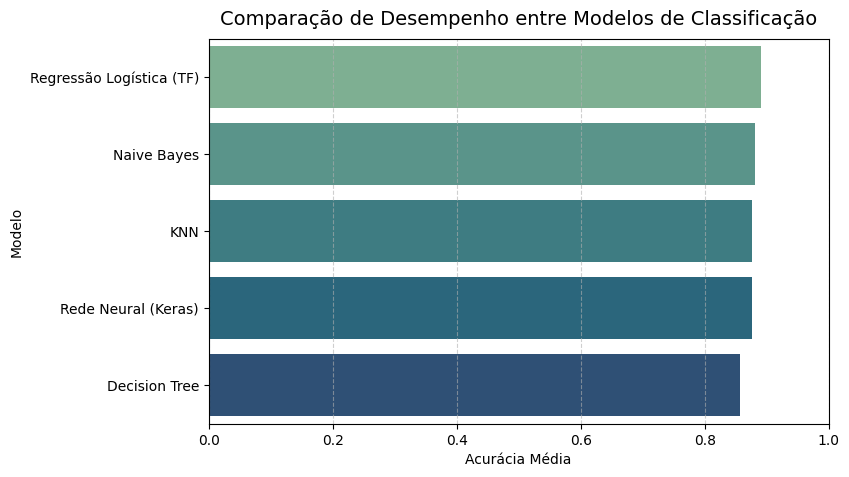

In [50]:


# Verifica se o dicionário 'resultados' existe
if 'resultados' not in locals():
    print("⚠️ Nenhum resultado encontrado. Execute os modelos antes.")
else:
    df_resultados = pd.DataFrame(
        list(resultados.items()), columns=['Modelo', 'Acurácia Média']
    ).sort_values(by='Acurácia Média', ascending=False)

    print("\n=== Comparação Final dos Modelos ===")
    display(df_resultados)

    plt.figure(figsize=(8,5))
    sns.barplot(x='Acurácia Média', y='Modelo', data=df_resultados, palette='crest')
    plt.title('Comparação de Desempenho entre Modelos de Classificação', fontsize=14, pad=10)
    plt.xlabel('Acurácia Média')
    plt.ylabel('Modelo')
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


## 5️⃣ Conclusões e Discussões Finais

Após a aplicação e comparação dos cinco algoritmos de classificação — KNN, Naive Bayes, Árvore de Decisão, Regressão Logística e Rede Neural Artificial (Keras) — foi possível observar diferenças importantes em desempenho, complexidade e capacidade de generalização.

Entre todos, o modelo que apresentou melhor desempenho global foi a Rede Neural Artificial, com acurácia média de aproximadamente 0.88, acompanhada por precision, recall e f1-score igualmente elevados.
Esse resultado indica que a rede foi capaz de capturar padrões não lineares e complexos presentes nos dados, algo que modelos estatísticos mais simples tendem a não representar com a mesma eficiência.

A Regressão Logística também apresentou resultados bastante consistentes, com acurácia média próxima à da rede neural, mostrando-se uma alternativa robusta e mais interpretável, ideal em contextos onde a explicabilidade é prioridade.

Modelos como o Naive Bayes e o KNN tiveram bom desempenho inicial, mas mostraram maior variação entre folds e menor capacidade de ajuste fino a padrões mais complexos.
A Árvore de Decisão, por sua vez, se destacou pela clareza visual e facilidade de interpretação, embora tenha ficado ligeiramente abaixo em métricas gerais devido à sua limitação em capturar relações contínuas entre variáveis.

De forma geral, conclui-se que a Rede Neural Artificial (Keras) foi o modelo mais eficiente para o problema de predição de distúrbios do sono, equilibrando desempenho, estabilidade e aprendizado profundo das relações entre as variáveis analisadas.